# KaggleOpdracht

In deze opdracht wordt het eindcijfer (G3) voorspeld op basis van verschillende eigenschappen van studenten als familie-relaties of persoonlijke activiteiten.

#### Imports en ophalen van de dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
df = pd.read_csv("../Data/HulpmiddelenBS/student_data.csv", sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

De dataset bestaat uit de volgende kolommen waarvan er geen 'NULL' variabelen bestaan:
 - __school__ = Type school  
            *('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)*
- __sex__ = Geslacht  
            *('F' - female or 'M' - male)*
- __age__ = Leeftijd  
            *(15 to 22)*
- __address__ = Huisadres  
            *('U' - urban or 'R' - rural)*
- __famsize__ = Grootte van het gezin  
            *('LE3' - less or equal to 3 or 'GT3' - greater than 3)*
- __Pstatus__ = Samenlevingsstatus van de ouders  
            *('T' - living together or 'A' - apart)*
- __Medu__ = Opleiding van moeder  
            *(0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)*
- __Fedu__ = Opleiding van vader  
            *(0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)*
- __Mjob__ = Baan van moeder  
            *('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')*
- __Fjob__ = Baan van vader  
            *('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')*
- __reason__ = Reden om voor deze school te kiezen  
            *(close to 'home', school 'reputation', 'course' preference or 'other')*
- __guardian__ = Voogd  
            *('mother', 'father' or 'other')*
- __traveltime__ = Reistijd  
            *(1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)*
- __studytime__ = Hoeveelheid tijd de student weekelijks besteed aan leren  
            *(1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - 10 hours)*
- __failures__ = Aantal gefaalde klassen  
            *(n if 1<=n<3, else 4)*
- __schoolsup__ = Has school support  
            *(yes or no)*
- __famsup__ = educatieven ondersteuning van het gezin  
            *(yes or no)*
- __paid__ = extra betaalde lessen binnen het vak Wiskunde of Portugees  
            *(yes or no)*
- __activities__ = Buitenschoolse activiteiten  
            *(yes or no)*
- __nursery__ = Is op de basisschool gezeten  
            *(yes or no)*
- __higher__ = Wilt het hoger ondeerwijs volgen  
            *(yes or no)*
- __internet__ = Heeft thuis beschikking tot het internet  
            *(yes or no)*
- __romantic__ = Heeft een romantische relatie  
            *(yes or no)*
- __famrel__ = Heeft goede relatie met familie  
            *(from 1 - very bad to 5 - excellent)*
- __freetime__ = Hoeveelheid vrije tijd na school  
            *(from 1 - very low to 5 - very high)*
- __goout__ = Gaat uit met vrienden  
            *(from 1 - very low to 5 - very high)*
- __Dalc__ = Drinkt alcohol op een werkdag  
            *(from 1 - very low to 5 - very high)*
- __Walc__ = Drinkt alcohol in het weekend  
            *(from 1 - very low to 5 - very high)*
- __health__ = Huidige gezondheid  
            *(from 1 - very low to 5 - very high)*
- __absences__ = Aantal afwezigheden  
            *(from 0 to 93)*
- __G1__ = Cijfer 1e periode  
            *(from 0 to 20)*
- __G2__ = Cijfer 2e periode  
            *(from 0 to 20)*
- __G3__ = Cijfer 3e periode  
            *(from 0 to 20)*

#### One-hot encoding

Bij de 'features' kunnen meerdere kolommen gedropt worden om de dataset op te schonen. Echter het weghalen van kolommen, waarvan gedacht dat deze niet belangrijk waren bij het trainen van het model (zoals address en traveltime), hadden weinig invloed op het eindresultaat. 

In [14]:
# De doelvariabele bepalen en deze (+ bepaalde andere features) uit de feature-set halen
target = "G3"
features = df.drop(columns=[target])
labels = df[target]

# Het onderscheiden van categorische en numerieke kolommen
categorical_cols = features.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = features.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [15]:
# One-hot encoder van de categorische kolommen
preprocessor = ColumnTransformer([
    ("onehot_encoder", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder="passthrough")

# Pipeline voor het maken van het Decision tree model
tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42, max_depth=5))
])

# Pipeline voor het maken van het Lineaire regressie model
linreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Pipelines zijn een consistente en leesbare manier om een reeks commandos in de juiste volgorde aan te laten roepen.
# Wanneer er dus een .fit() op de pipeline wordt uitgevoerd, wordt de data eerst geprocessed (1e pipeline)
# en vervolges wordt het model getraind op de data.

#### Trainen van de data

In [ ]:
# Verdeling van de modellen (80% training, 20% testset)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Trainen van de modellen
linreg_pipeline.fit(X_train, y_train)
tree_pipeline.fit(X_train, y_train)

In [17]:
# Voorspellingen op de testset
y_pred_linreg = linreg_pipeline.predict(X_test)
y_pred_tree = tree_pipeline.predict(X_test)

In [18]:
# Prestaties van de modellen uitrekenen
linreg_mse = mean_squared_error(y_test, y_pred_linreg)
linreg_r2 = r2_score(y_test, y_pred_linreg)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

# MSE (mean squared error): Hoe ver zitten de voorspellingen naast de ecte waarden
# R^2: Hoe goed verklaart het model de variatie in de data 
print(f"Lineaire Regressie - MSE: {linreg_mse:.2f}, R2: {linreg_r2:.3f}")
print(f"Decision Tree - MSE: {tree_mse:.2f}, R2: {tree_r2:.3f}")

Lineaire Regressie - MSE: 5.66, R2: 0.724
Decision Tree - MSE: 5.78, R2: 0.718


MSE en R2 lijken redelijk positief uit te komen, hier komen we echter later op terug.

In [19]:
# Extract decision tree regressor uit pipeline
tree_model = tree_pipeline.named_steps["regressor"]

# One-hot encoded feature names ophalen
ohe = tree_pipeline.named_steps["preprocessor"].named_transformers_["onehot_encoder"]
encoded_cat_cols = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_cat_cols) + numerical_cols


#### Decision Tree

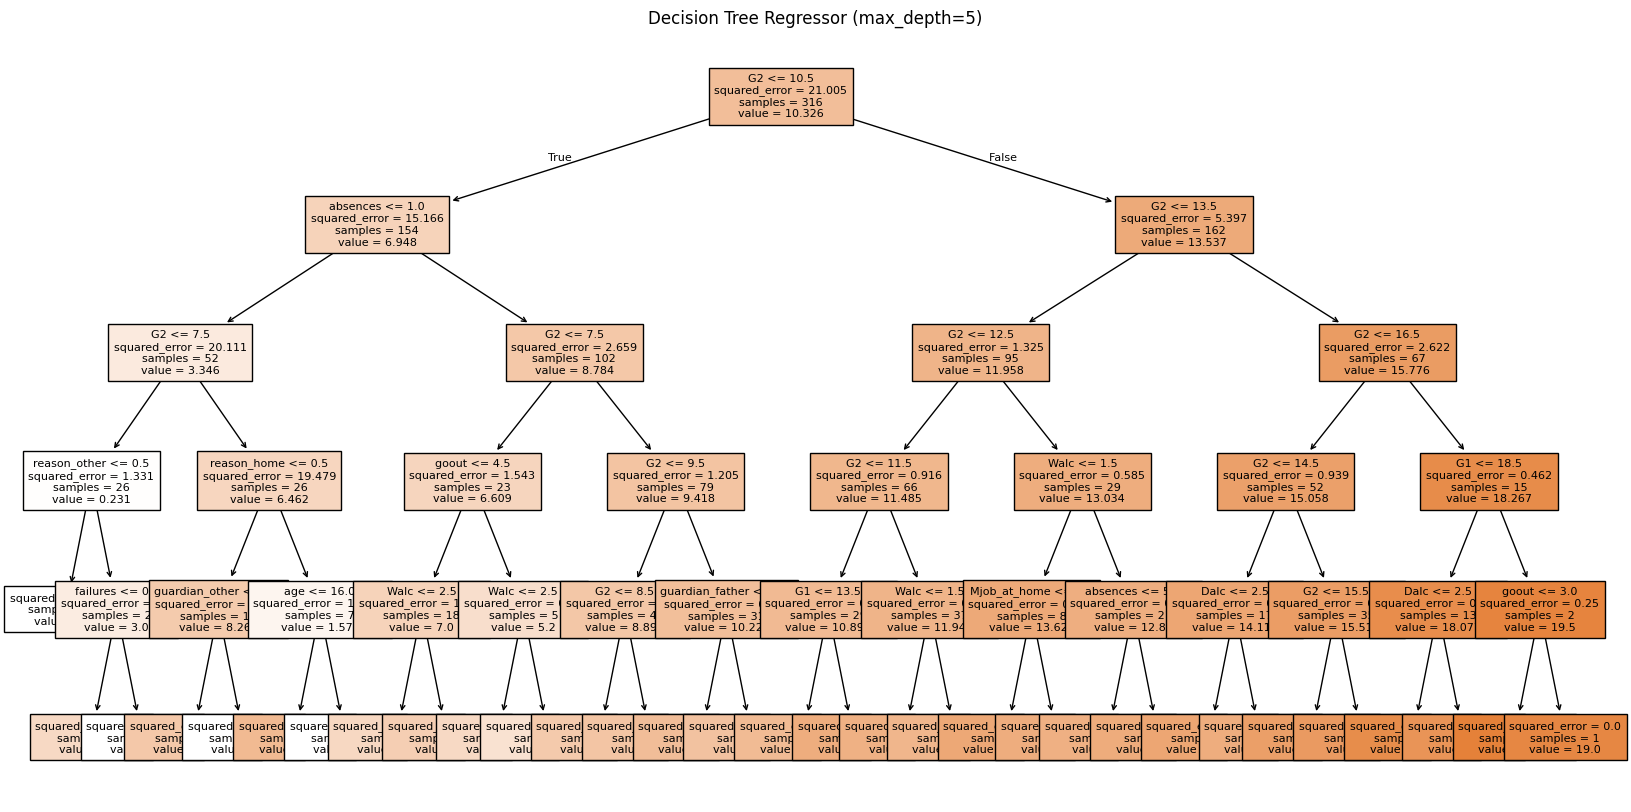

In [20]:
# Plot het decision tree model
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=all_feature_names, filled=True, fontsize=8)
plt.title("Decision Tree Regressor (max_depth=5)")
plt.show()

#### Feature importance

In [21]:
# Print de features uit die de meeste invloed hebben op de modellen
importances = tree_model.feature_importances_
pd.Series(importances, index=all_feature_names).sort_values(ascending=False).head(20)

G2                 0.764239
absences           0.159270
reason_home        0.035724
age                0.016175
guardian_other     0.011240
Walc               0.003464
failures           0.002807
reason_other       0.002591
goout              0.002055
G1                 0.001262
guardian_father    0.000607
Dalc               0.000403
Mjob_at_home       0.000162
famsize_LE3        0.000000
Mjob_teacher       0.000000
Mjob_health        0.000000
Mjob_other         0.000000
famsize_GT3        0.000000
Pstatus_T          0.000000
Pstatus_A          0.000000
dtype: float64

#### Lineaire regressie

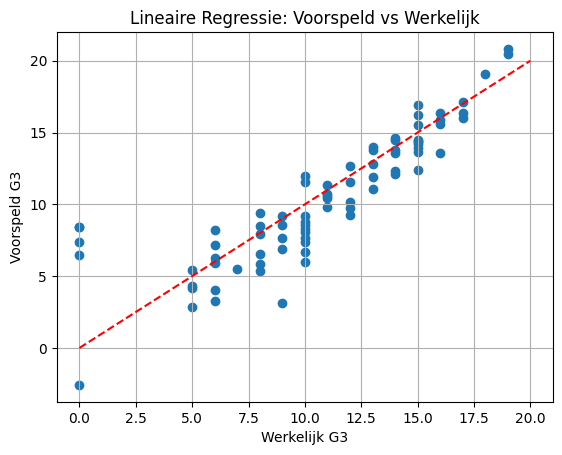

In [22]:
# Plot het linieare regressie model
plt.scatter(x=y_test, y=y_pred_linreg)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Diagonale lijn
plt.xlabel("Werkelijk G3")
plt.ylabel("Voorspeld G3")
plt.title("Lineaire Regressie: Voorspeld vs Werkelijk")
plt.grid(True)
plt.show()


## Eind evaluatie

Boven wordt de data weergegeven welke features het meeste invloed heeft bij het splitsen van de data om voorspellingen te verbeteren.

Hieruit blijkt dat afwezigheden en het tweede cijfer (G2) bij verre weg het meeste invloed hebben hierop. Hoewel de eerste vrij logisch klinkt is de 2e moeilijk te geloven wanneer er ook variabelen zoals 'studytime', 'freetime' en 'failures' tussen staan.

Bij een 2e test zijn G1 en G2 uit de dataset gehaald waarbij 'absences', 'failures', 'health' en 'studytime' omhoog schoten in hoeveel invloed dit had op de resultaten. De R^2 en MSE daarintegen hadden een veel slechter resultaat.

Beide modellen zouden kunnen worden verbeterd wanneer deze meer data te verwerken krijgen t.o.v. de 395 huidige entries.